#### ASSIGNMENT 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

error_one = []
weight_update = []

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
 
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate):
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)
        loss = np.mean(np.abs(output_error))
        error_one.append(loss)
        self.error.append(loss)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)
        
        update_hidden_output = np.dot(self.hidden_output.T, output_delta) * learning_rate
        update_input_hidden = np.dot(X.T, hidden_delta) * learning_rate

        total_update = np.sum(np.abs(update_hidden_output)) + np.sum(np.abs(update_input_hidden))
        weight_update.append(total_update)

        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        self.error = []
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
        return self.error

X = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y = np.array([[0], [0], [1], [1], [0], [0], [1], [0]])

nn = NeuralNetwork(input_size=3, hidden_size=2, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.1)

output = nn.feedforward(X)
print("Predictions :")
print(output)

Predictions :
[[2.31530976e-02]
 [1.20984046e-03]
 [9.93991096e-01]
 [9.68288361e-01]
 [1.20463425e-03]
 [8.90458120e-04]
 [9.68230722e-01]
 [2.90765541e-02]]


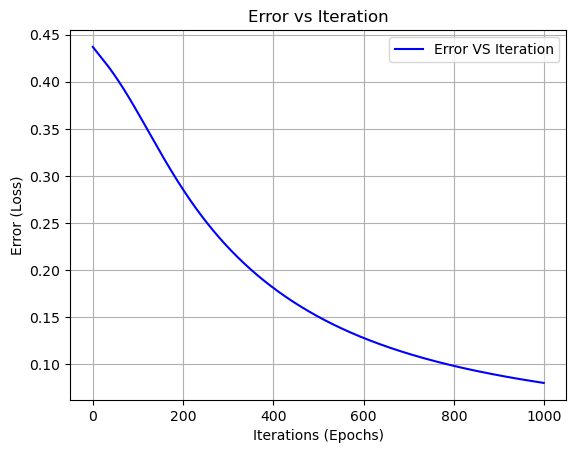

In [64]:
plt.plot(range(len(error_one)), error_one, label="Error VS Iteration", color='b')
plt.xlabel("Iterations (Epochs)")
plt.ylabel("Error (Loss)")
plt.title("Error vs Iteration")
plt.legend()
plt.grid(True)
plt.show()

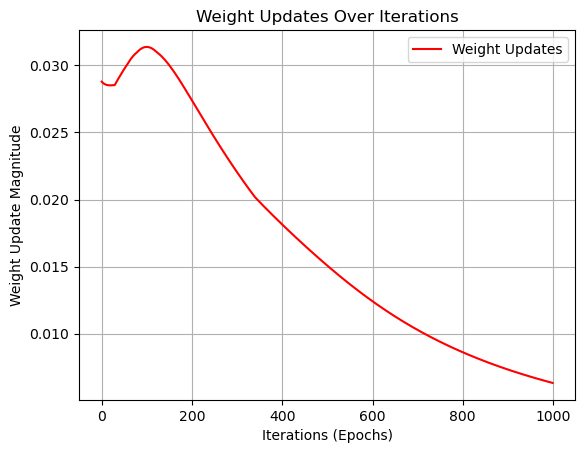

In [65]:
plt.plot(range(len(weight_update)), weight_update, label="Weight Updates", color='r')
plt.xlabel("Iterations (Epochs)")
plt.ylabel("Weight Update Magnitude")
plt.title("Weight Updates Over Iterations")
plt.legend()
plt.grid(True)

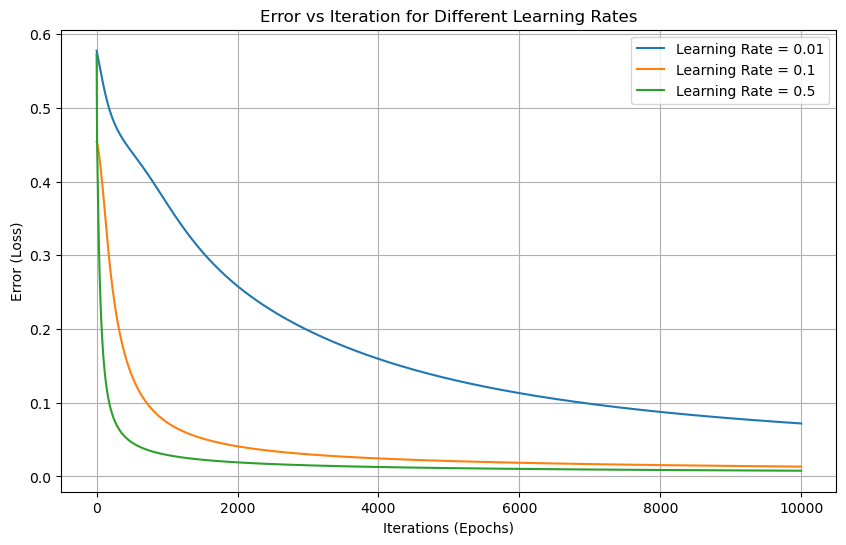

In [66]:
learning_rates = [0.01, 0.1, 0.5]
errors = {}

for lr in learning_rates:
    nn = NeuralNetwork(input_size=3, hidden_size=2, output_size=1)
    errors[lr] = nn.train(X, y, epochs=10000, learning_rate=lr)

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    plt.plot(range(len(errors[lr])), errors[lr], label=f"Learning Rate = {lr}")

plt.xlabel("Iterations (Epochs)")
plt.ylabel("Error (Loss)")
plt.title("Error vs Iteration for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))

# If Neural Network expects 2D input (use 2D grid points)
grid = np.c_[xx.ravel(), yy.ravel()]  # Remove third feature if NN expects only 2 inputs

# Predict on the grid
predictions = nn.feedforward(grid)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary classes
predictions = predictions.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predictions, alpha=0.5, cmap='bwr')  # Blue-Red colormap
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors='k', cmap='bwr')  # Use X, not X_train
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary for Neural Network")
plt.show()

ValueError: shapes (10000,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)